In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_store_numba import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'calc_csat.py',
 'model_equations_separate_NC_store.py',
 'model_equations_separate_NC_store_numba.py',
 'Model_Parameters Store model.xlsx',
 'model_param_sensitivity_ponly.ipynb',
 'model_store_cc debug.ipynb',
 'model_store_cc.ipynb',
 'model_store_ponly.ipynb',
 'model_store_ponly_find_lsq_x0.ipynb',
 'reference_10cc.xlsx',
 'reference_10cc_axenic.xlsx',
 'reference_pro99_axenic.xlsx',
 'results_postprocess.py',
 'run_files',
 'run_least_squares_het.py',
 'run_least_squares_ponly.py',
 'run_monte.py',
 'run_shgo_ponly.py',
 'VPRO',
 '__pycache__']

In [6]:
refdf = pd.read_excel('reference_pro99_axenic.xlsx',)


In [7]:
param_vals = get_param_vals('OVERFLOW')
param_vals = get_param_vals('MIXOTROPH')
param_vals = get_param_vals('EXOENZYME')


In [12]:
model = 'MIN'
jsonl=[]
pro99_mode = True

which_organism = 'ponly'
maxday = 100
new_param_vals = get_param_vals_from_json_list(model, jsonl)
suffix = get_runid_unique_suffix(pro99_mode, which_organism, model, new_param_vals)
t_eval, t_end = get_t_eval_and_t_end(None, refdf, maxday)
(var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
    ) = get_constants_per_organism(pro99_mode, which_organism)
par_tuple = prepare_params_tuple(new_param_vals)


In [14]:
print_dydt0(calc_dydt, var_names, init_var_vals,par_tuple)


dBp/dt = -4.13e-06, init Bp = 1.79e+00, newval = 1.79e+00
dNp/dt = 2.93e-05, init Np = 0.00e+00, newval = 2.93e-05
dCp/dt = 1.17e-04, init Cp = 0.00e+00, newval = 1.17e-04
dDON/dt = 3.72e-06, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 4.13e-07, init RDON = 0.00e+00, newval = 4.13e-07
dDIN/dt = -2.93e-05, init DIN = 8.00e+02, newval = 8.00e+02
dDOC/dt = 2.60e-05, init DOC = 1.32e+02, newval = 1.33e+02
dRDOC/dt = 2.89e-06, init RDOC = 0.00e+00, newval = 2.89e-06
dDIC/dt = -1.17e-04, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = 0.00e+00, init ROS = 2.00e-01, newval = 2.00e-01


In [15]:
print_intermediate0(intermediate_func, interm_names, init_vars)


NameError: name 'intermediate_func' is not defined

In [16]:
biomass_diff0_ponly(calc_dydt, var_names,init_vars)


NameError: name 'init_vars' is not defined

In [17]:
var_names

['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS']

In [19]:
init_var_vals

array([1.78571429e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+01,
       0.00000000e+00, 8.00000000e+02, 1.32500000e+02, 0.00000000e+00,
       2.24155230e+03, 2.00000000e-01])

In [22]:
#sol = run_solver(calc_dydt, init_vars)
#sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))
MSE_err, new_param_vals, df, mse_df = run_solver_from_new_params(
    new_param_vals, refdf, 
    init_var_vals, 
    calc_dydt, prepare_params_tuple, t_end , t_eval, var_names, intermediate_names,return_dfs=True
)


In [23]:
df.head()

,Bp,Np,Cp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,...,uptakeCp,QCp,biosynthesisNp,respirationCp,biomass_breakdownCp,overflowNp,overflowCp,Bp[C],Bptotal,Bptotal[C]
0,1.785714,0.000000,0.000000,20.000000,0.000000,800.000000,132.500000,0.000000,2241.552301,0.2,...,0.000143,7.000000,7.168328e-10,0.000026,0.0,0.0,0.0,12.500000,1.785714,12.500000
1,2.514642,1.069368,4.765226,20.368545,0.047288,797.785871,134.961780,0.301506,2229.441380,0.2,...,0.000253,6.240975,2.382737e-05,0.000038,0.0,0.0,0.0,17.602496,3.584010,22.367722
2,4.918647,2.167567,9.661915,21.172232,0.154769,793.372499,140.254756,0.970668,2204.321285,0.2,...,0.000497,6.222285,4.831201e-05,0.000075,0.0,0.0,0.0,34.430532,7.086214,44.092448
3,10.635527,4.689720,20.903748,23.068378,0.408603,782.983486,152.737826,2.550015,2146.800858,0.2,...,0.001075,6.221918,1.045240e-04,0.000162,0.0,0.0,0.0,74.448688,15.325247,95.352435
4,21.515471,9.487253,42.288007,26.676598,0.891636,763.214757,176.492004,5.555404,2038.771565,0.2,...,0.002175,6.221915,2.114507e-04,0.000329,0.0,0.0,0.0,150.608296,31.002724,192.896303


In [24]:
mdf = df.melt(id_vars=['t', 'day'])

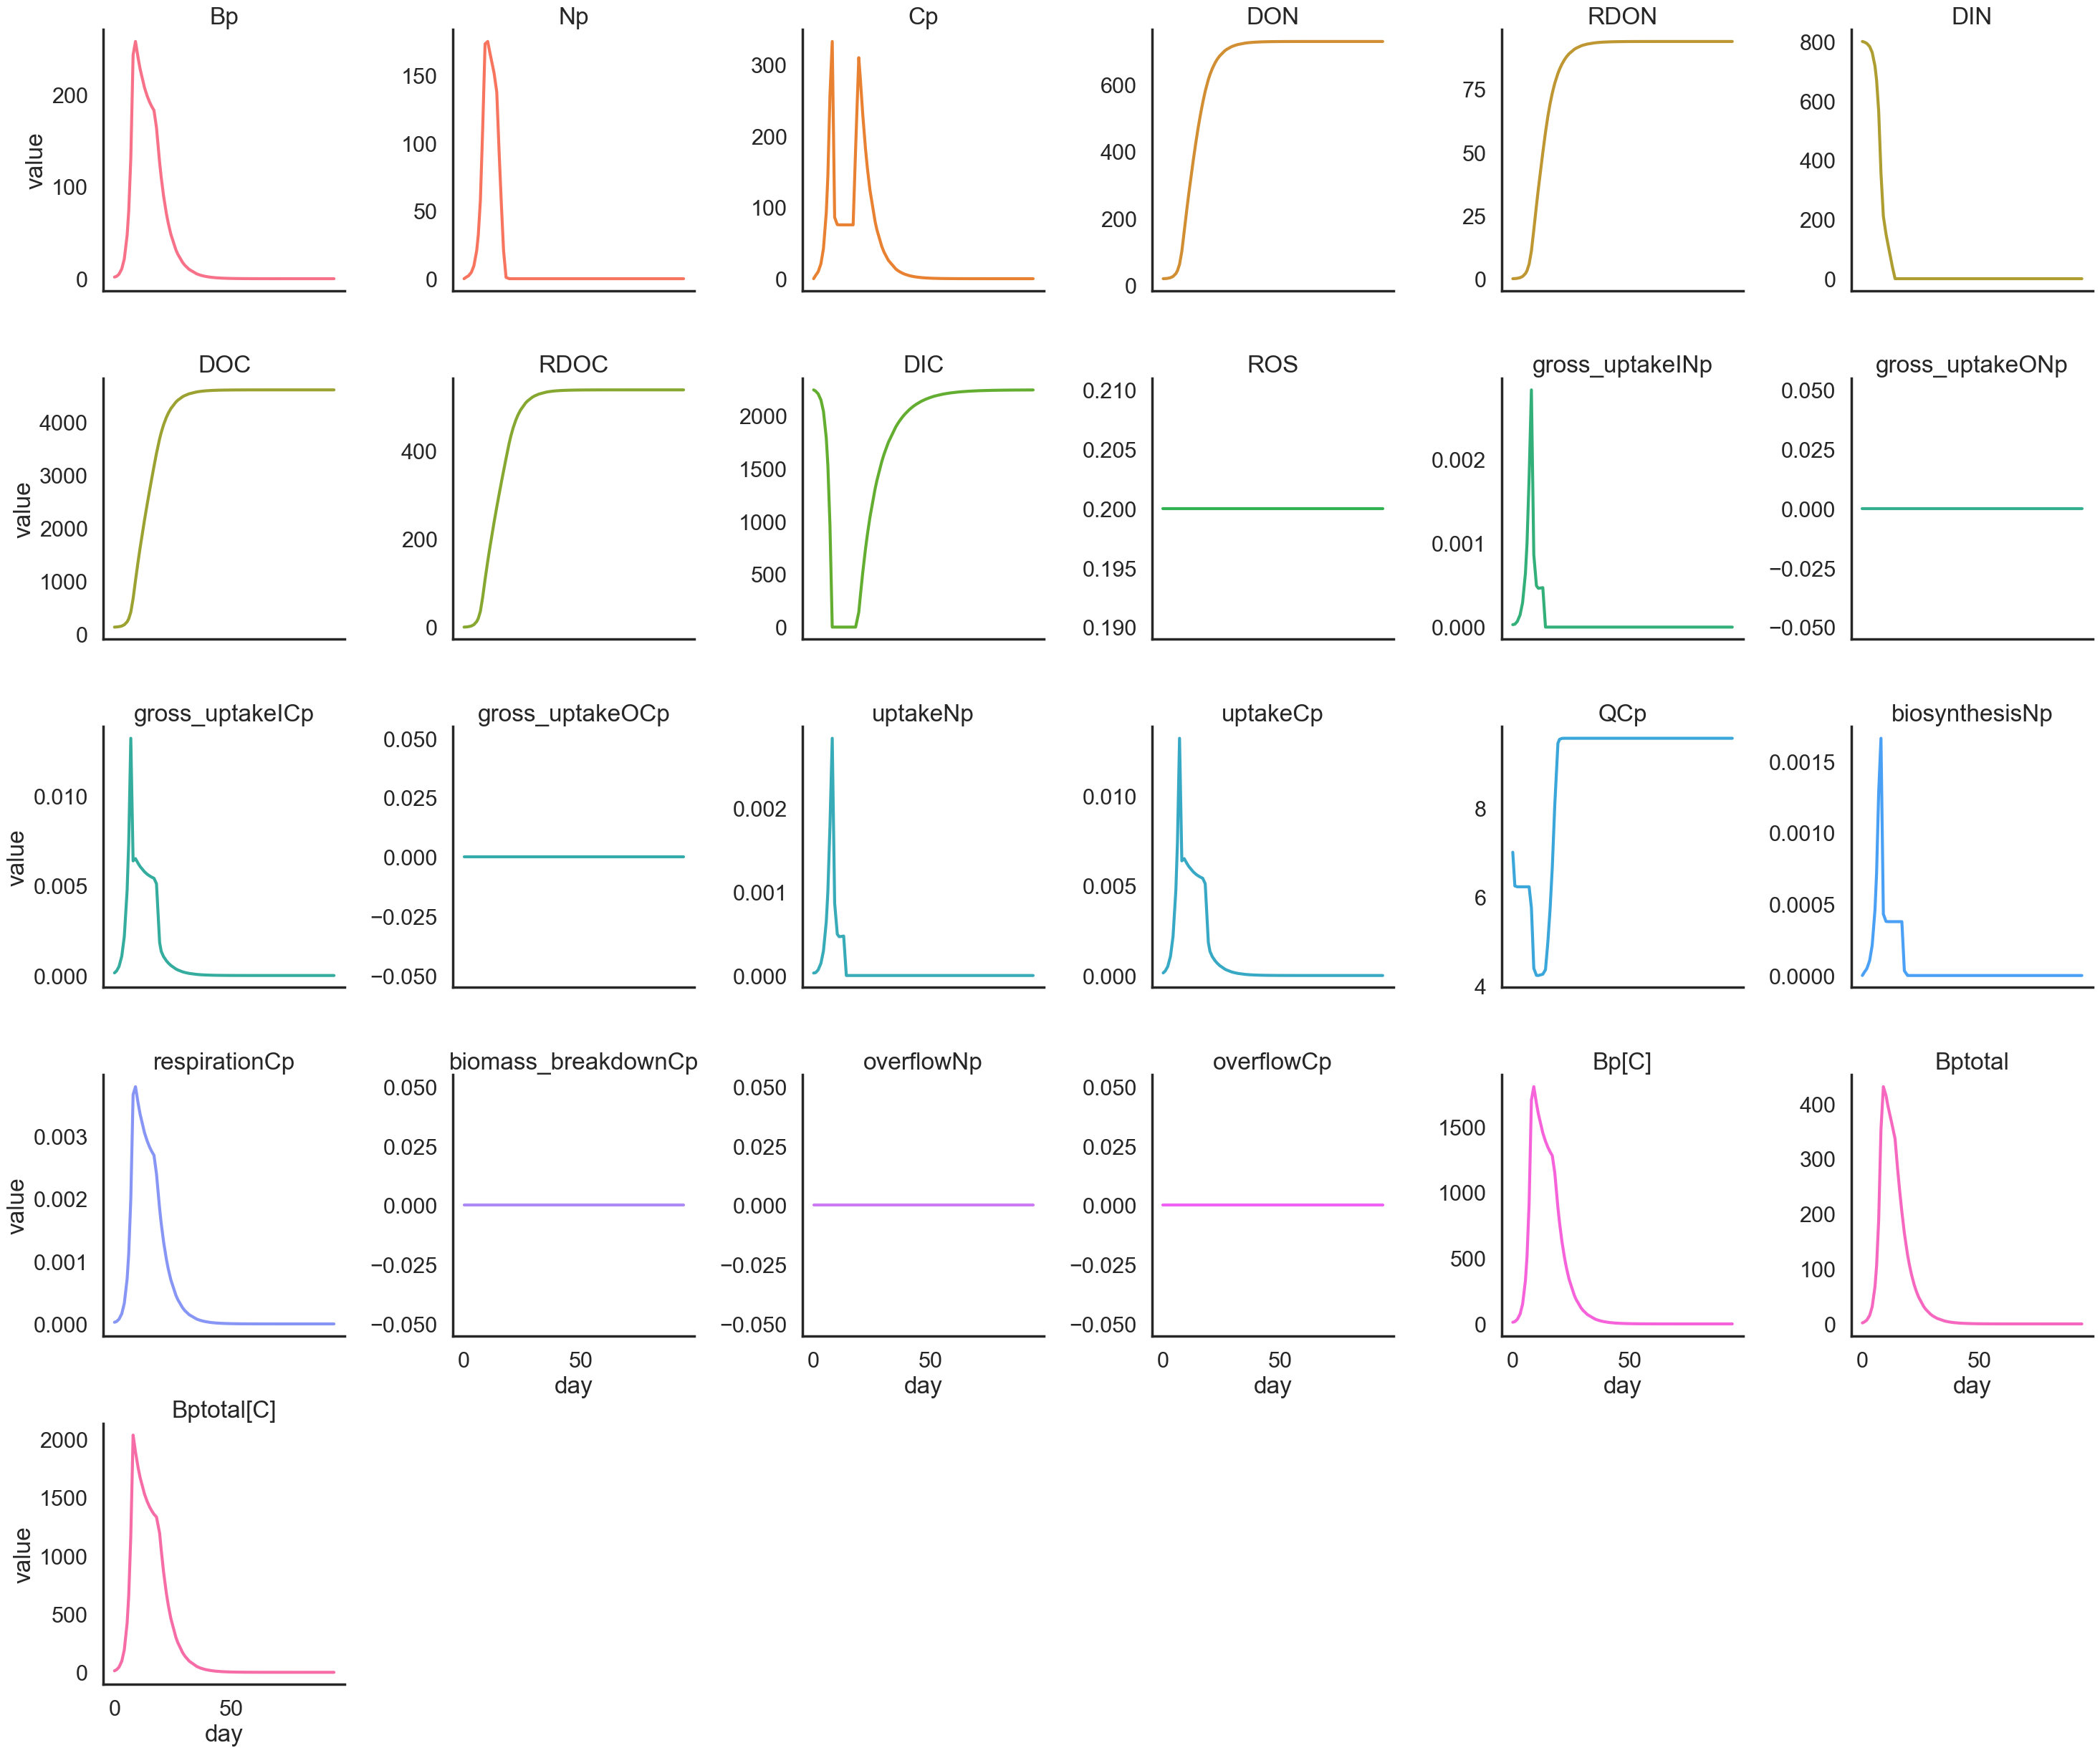

In [25]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

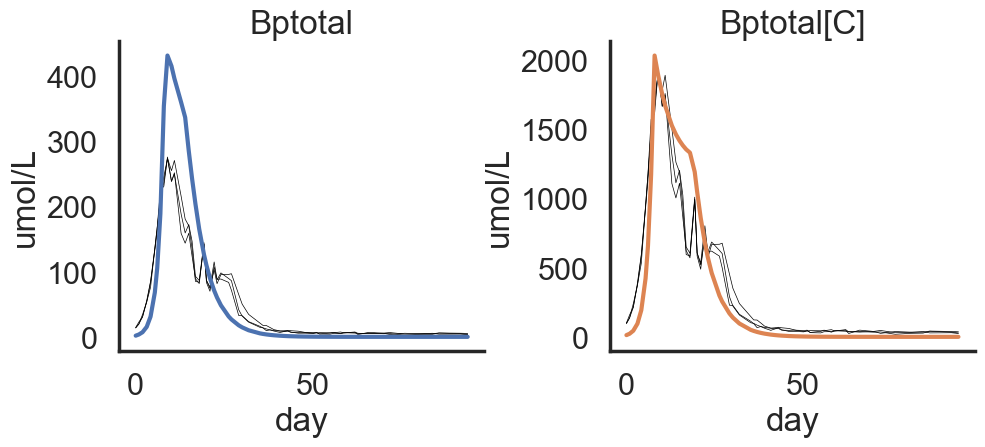

In [55]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Bptotal', 'Bptotal[C]'])], x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}').set(ylabel='umol/L')
sns.lineplot(data=refdf, x='day', y='ref_Bp',
            units='Sample', estimator=None,
            legend=False,
            ax=g.axes[0], color='black', zorder=1, lw=0.5,
           )
sns.lineplot(data=refdf, x='day', y='ref_Bp[C]',
            units='Sample', estimator=None,
            legend=False,
            ax=g.axes[1], color='black', zorder=1,lw=0.5,
           )
    
plt.show()

In [43]:
refdf['ref_Bp[C]'] = refdf['ref_Bp'] * 7 

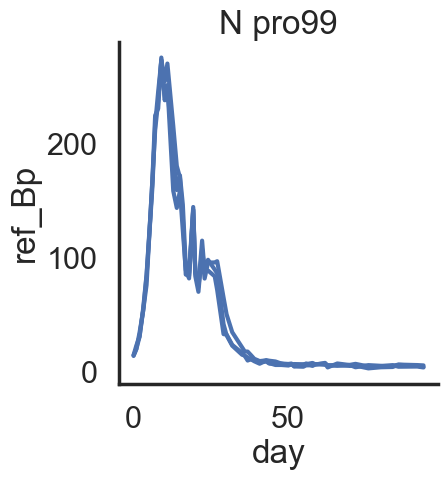

In [41]:
sns.relplot(data=refdf, x='day', y='ref_Bp',
            kind='line', 
            units='Sample', estimator=None,
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.title('N pro99')
plt.show()

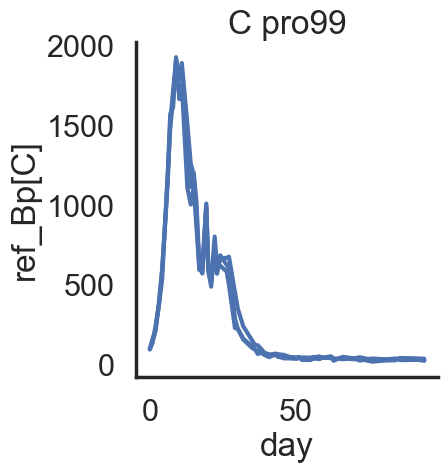

In [44]:
sns.relplot(data=refdf, x='day', y='ref_Bp[C]',
            kind='line', 
            units='Sample', estimator=None,
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.title('C pro99')
plt.show()

In [29]:
50/7, 25*7

(7.142857142857143, 175)

In [35]:
40 / 14 * 4.5 * 12

154.28571428571428

In [26]:
mse_df

,Sample,full name,Group,compare_points,MSE
0,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,3484.107139
1,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,3757.494345
2,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,4221.472802


In [27]:
compute_mse(df,refdf)

,Sample,full name,Group,compare_points,MSE
0,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,3484.107139
1,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,3757.494345
2,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,4221.472802


In [83]:
refdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'predicted', 'ref_Bp',
       'full name', 't'],
      dtype='object')

In [84]:
df.min()

Bp                                     1.690692e+00
Np                                     0.000000e+00
Cp                                     0.000000e+00
DON                                    1.600000e+01
RDON                                   0.000000e+00
DIN                                    1.296061e-02
DOC                                    1.325000e+02
RDOC                                   0.000000e+00
DIC                                    4.120310e-01
ROS                                    4.940166e-02
ABp                                    0.000000e+00
ABh                                    0.000000e+00
t                                      0.000000e+00
day                                    0.000000e+00
gross_uptakeINp                        6.767573e-06
gross_uptakeONp                        0.000000e+00
gross_uptakeICp                        3.428353e-05
gross_uptakeOCp                        0.000000e+00
uptakeNp                               6.767573e-06
uptakeCp    

In [85]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol N/l')
sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol C/l')
#sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')



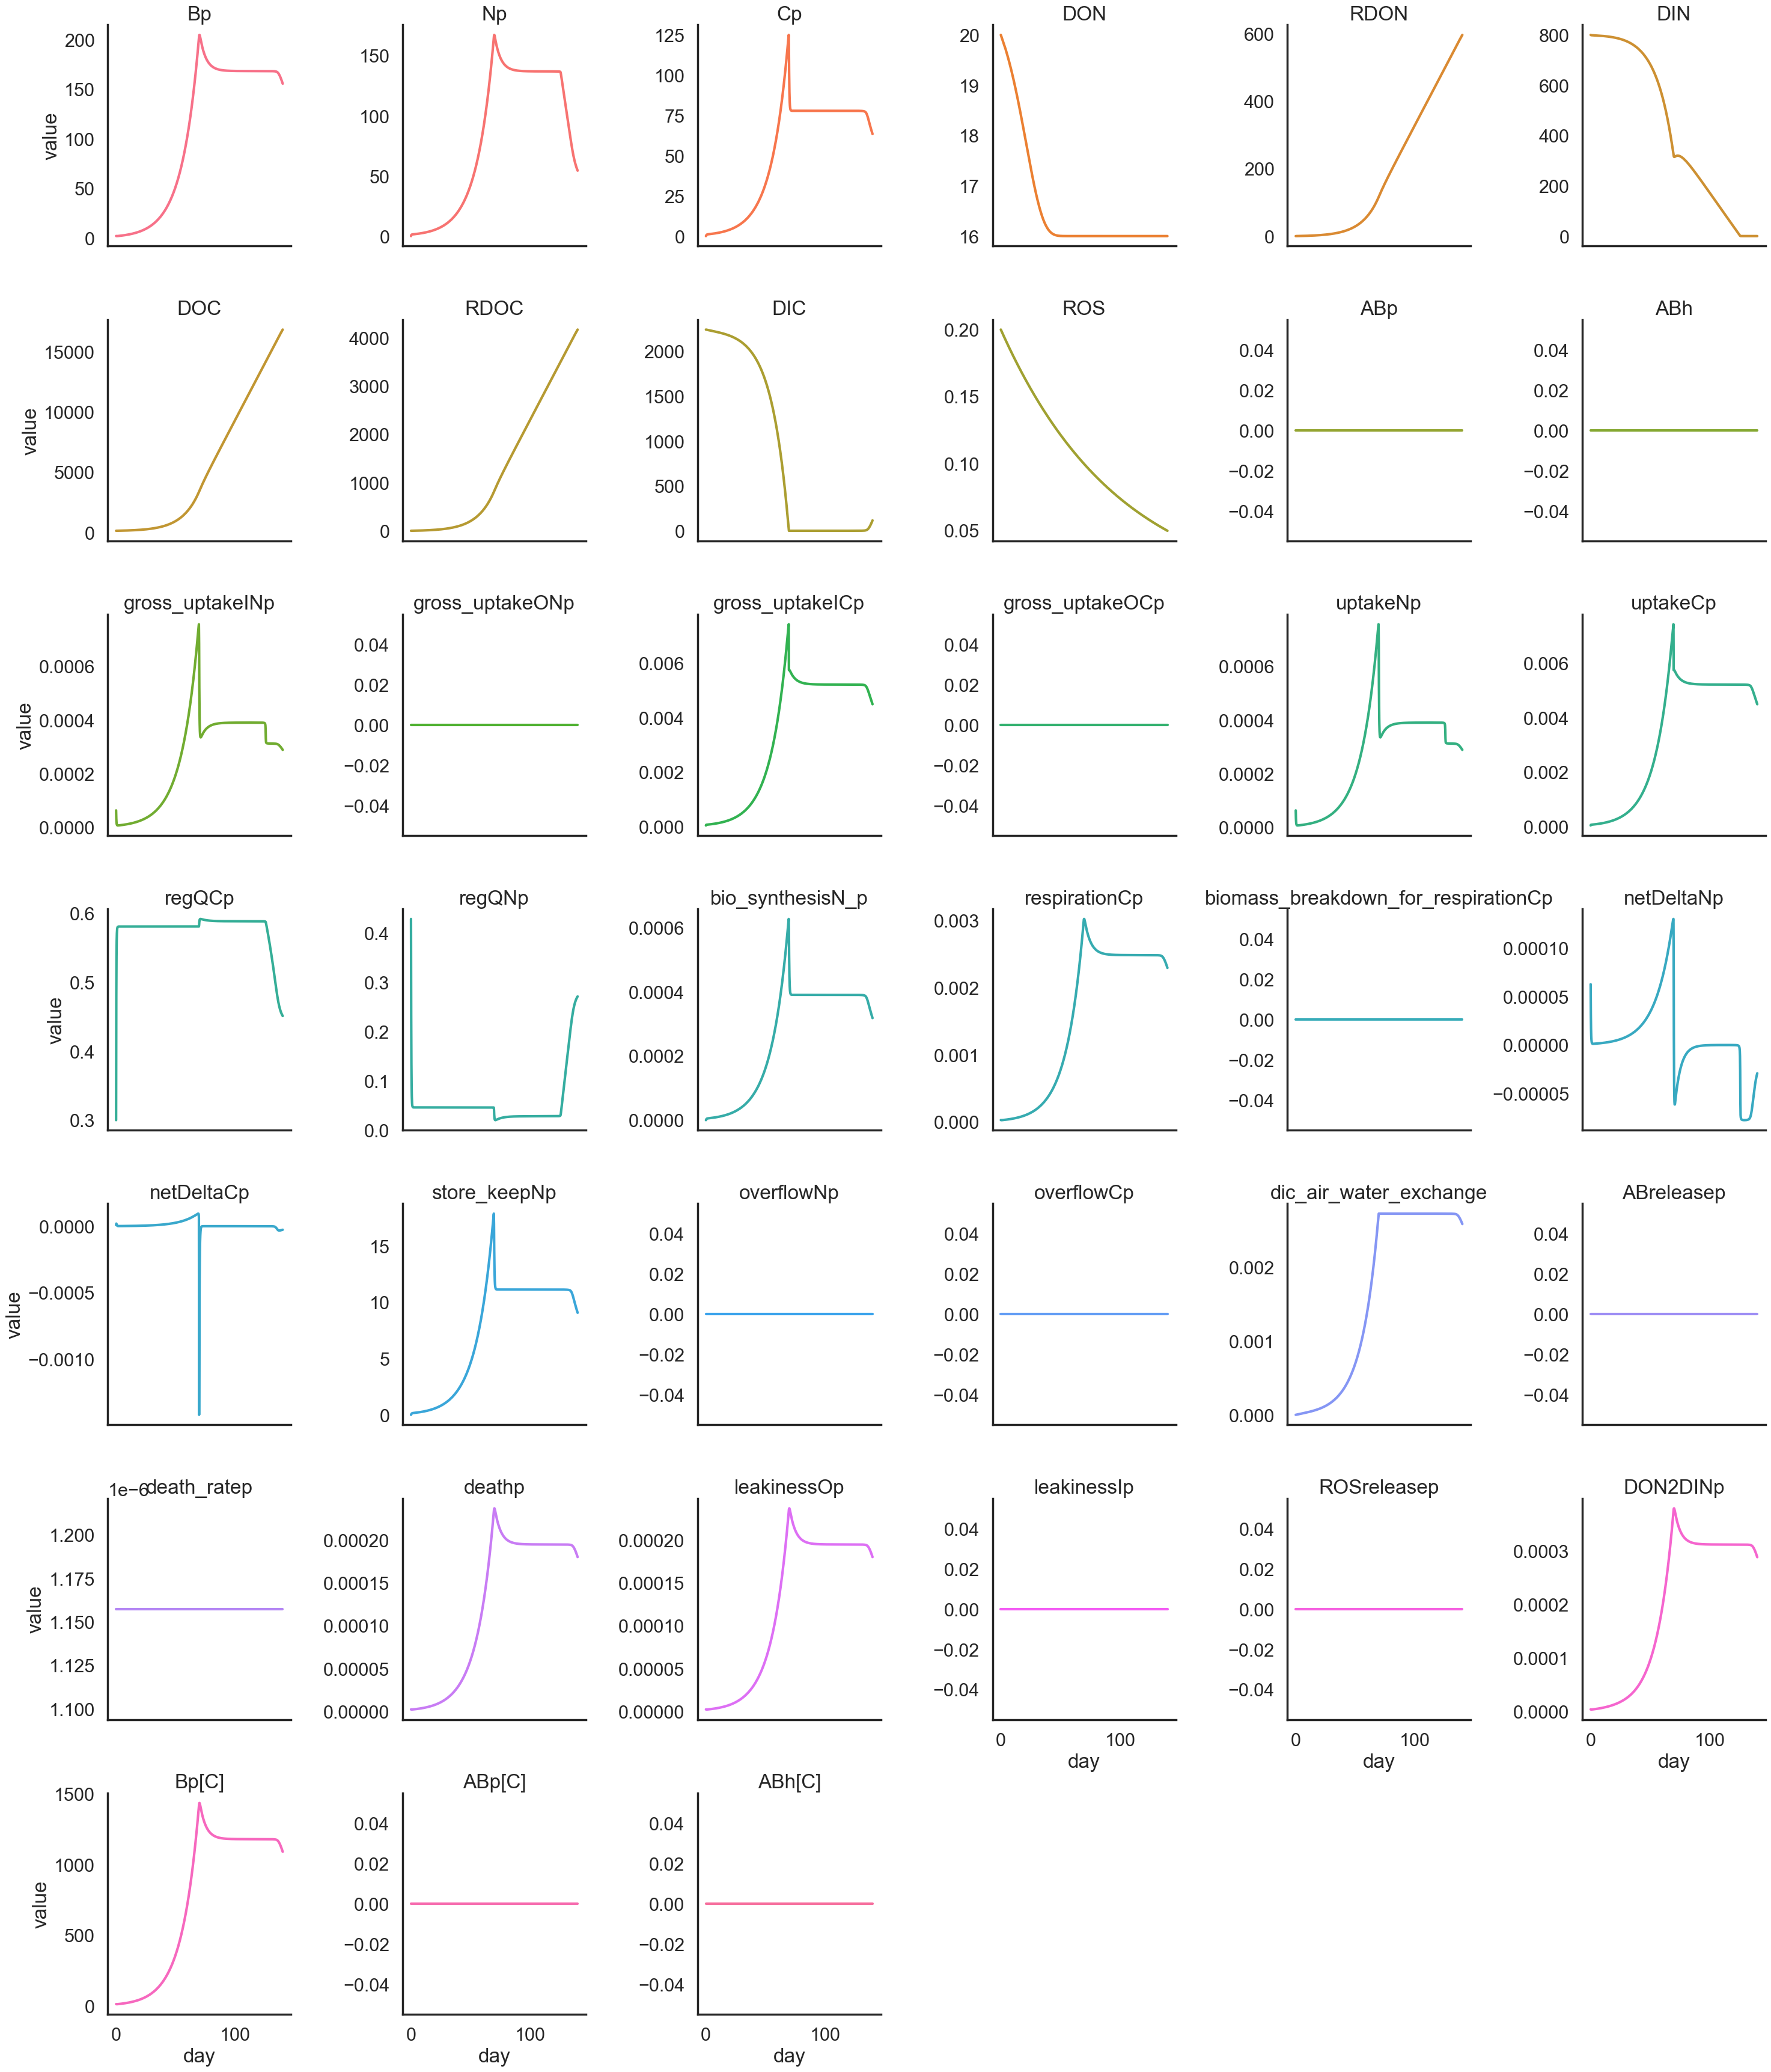

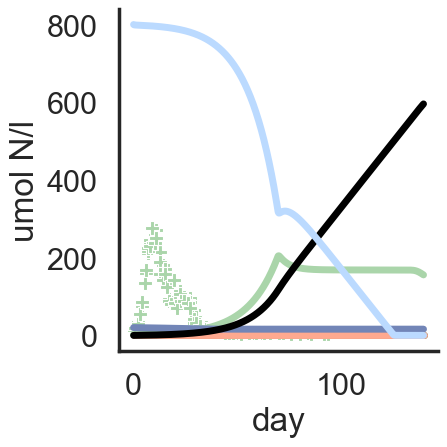

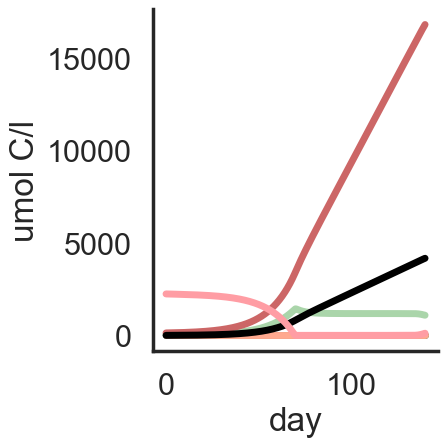

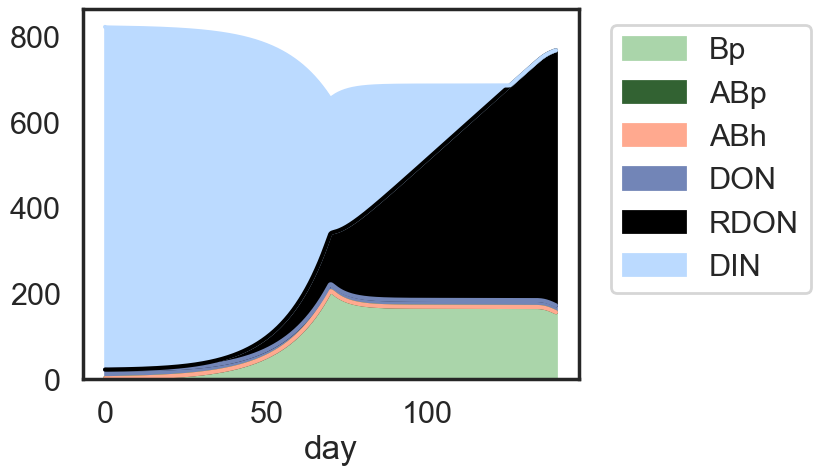

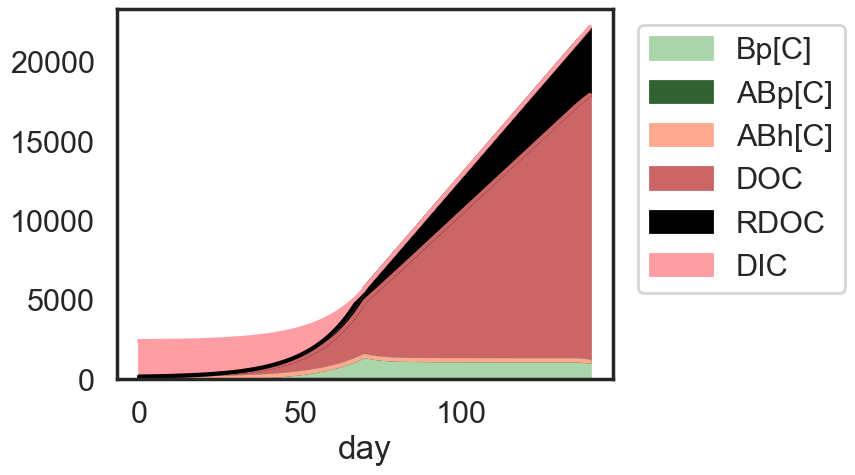

In [86]:
from matplotlib.colors import LinearSegmentedColormap
df.clip(lower=0)[pnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df.clip(lower=0)[pcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()


In [87]:
len(param_vals)

In [88]:
df.min()

Bp                                     1.690692e+00
Np                                     0.000000e+00
Cp                                     0.000000e+00
DON                                    1.600000e+01
RDON                                   0.000000e+00
DIN                                    1.296061e-02
DOC                                    1.325000e+02
RDOC                                   0.000000e+00
DIC                                    4.120310e-01
ROS                                    4.940166e-02
ABp                                    0.000000e+00
ABh                                    0.000000e+00
t                                      0.000000e+00
day                                    0.000000e+00
gross_uptakeINp                        6.767573e-06
gross_uptakeONp                        0.000000e+00
gross_uptakeICp                        3.428353e-05
gross_uptakeOCp                        0.000000e+00
uptakeNp                               6.767573e-06
uptakeCp    